# K-Means Clustering

The goal of clustering is to separate data, so that data points (observations) similar to one another are in the same group. We need to therefore decide how to define similarity, and how many groups do we choose. Clustering is commonly used to explore a dataset to either identify the underlying patterns in it or to create a group of characteristics. In the case of social networks, they can be clustered to identify communities.

**K-Means** is the most popular clustering technique:

 - The "K" refers to the number of clusters (groups) we expect to find in a dataset.

 - The "Means" refers to the average distance between data points(observations) to each cluster center, also known as the `centroid`, which we are trying to minimize.

The process is iterative, `k` data points are choosen at random to be the `centroids` and the mean distance of the neighbouring points to the `centroid` calculated. The process is repeated by randomly selecting another `k` centroids and calculating the mean distance of neighbouring points to the centroid(cluster center). 

This process is repeated until **convergance**, when the points don't move between clusters and centroids stabilize.

We can now take a new unlabeled data point and assign it to the appropriate cluster.

<img src="img/k-means-clustering-1.gif" width="600">

## Using the Iris Dataset

Available from `sklearn`, we can import and load it using the following commands:


```py
from sklearn import datasets
iris = datasets.load_iris()
```

The data looks like this:

```py
[[ 5.1  3.5  1.4  0.2 ]
 [ 4.9  3.   1.4  0.2 ]
 [ 4.7  3.2  1.3  0.2 ]
 [ 4.6  3.1  1.5  0.2 ]
   . . .
 [ 5.9  3.   5.1  1.8 ]]
```

Each inner list relates to one sample(flower), each value relates to a characteristic or **feature** and is a column in the dataset.

There are 4 features/attributes recorded in the dataset:

 - Column 0: Sepal length in cm
 - Column 1: Sepal width in cm
 - Column 2: Petal length in cm
 - Column 3: Petal width in cm
 
The dataset relates to 3 species of iris plants, 50 samples for each.

You can see the actual data using:

```py
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 ....
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
```

and the label/target values using:

```py
print(iris.target)

[0 0 0 ...0 0 0 1 1 1 ... 1 1 1 2 2 ... 2 2]
```

You can also get the descriptions using:

```py
print(iris.DESCR)
```

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from copy import deepcopy

# load the iris dataset from sklearn
iris = datasets.load_iris()
# print(iris.data)

In [2]:
print(iris.target)

print(iris.DESCR)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.

We can create a 2D scatter plot of the Iris dataset using two of its features (sepal length vs. petal length). The sepal length measurements are stored in column 0 of the matrix, and the petal length measurements are stored in column 2 of the matrix.

### Visualize the Iris Dataset

We can create a 2D scatter plot of the Iris dataset using two of its features (sepal length vs. petal length) with Matplotlib. The sepal length measurements are stored in column 0 of the matrix, and the petal length measurements are stored in column 2 of the matrix.

To retrieve specific columns of data, we can use the NumPy/Pandas notation [start:end, column_index], where 'start' is the index of the first row, 'end' is the index of the last row, and 'column_index' is the index of the reauired column. Thus `matrix[:, 0]` would be all rows of the 1st column.

Text(0,0.5,'petal length (cm)')

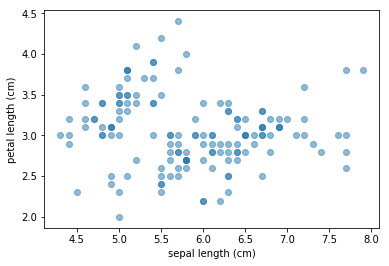

In [3]:
samples = iris.data
x = samples[:, 0] # 1st column
y = samples[:, 1] # 2nd column

# plot the data
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

## Implementing K-Means

### 1. place k random centroids for the initial clusters

Because we expect there to be three clusters (for the three species of flowers), let's implement K-Means where the k is 3.

In [4]:
# Number of clusters
k = 3

Use NumPy's `random.uniform()` function to generate random values in two lists:

 - a `centroids_x` list that will have k random values between `min(x)` and `max(x)`
 - a `centroids_y` list that will have k random values between `min(y)` and `max(y)`

The `centroids_x` will have the x-values for our initial random centroids and the `centroids_y` will have the y-values for our initial random centroids.

In [5]:
# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), size=k)
# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), size=k)

Create an array of the initial `centroids`

In [6]:
centroids = np.array(list(zip(centroids_x, centroids_y)))
print(centroids)

[[7.65580563 3.92773935]
 [5.17125716 2.73612578]
 [7.25810635 3.1969983 ]]


Plot the `centroids`

Text(0,0.5,'petal length (cm)')

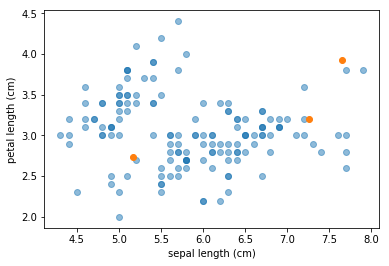

In [7]:
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

### 2. Assign data samples to the nearest centroid.

We've created 3 random `centroids`, the next stage is to iterate through the dataset and calculate the distance of EACH data point to EACH of the 3 `centeroids` using a Euclidean formula.

In [8]:
# Distance formula
def distance(a, b):
  distance = 0
  for i in range(len(a)):
    distance += (a[i] - b[i]) ** 2
  return distance ** 0.5
# def distance(a, b):
#   one = (a[0] - b[0]) **2
#   two = (a[1] - b[1]) **2
#   distance = (one+two) ** 0.5
#   return distance

In [9]:
# Create an array that will hold the cluster labels for each data point. 
# Its size should be the length of the data sample.
labels = np.zeros(len(samples)) # [ 0.  0.  0.  0.  0.  0.  ...  0.]

# Create an array that will hold the distances for each centroid. 
# It should have the size of k.
distances = np.zeros(k) # [ 0.  0.  0.]

To assign each data point to the closest centroid, we need to iterate through the whole data sample and calculate each data point's distance to each centroid.

In [10]:
sepal_length_width = np.array(list(zip(x, y)))

for i in range(len(samples)):
    # find the distance of each data point from the centroid
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    
    # get the index of the smallest distance of distances
    cluster = np.argmin(distances)
    
    # assign the cluster to each index of the labels array.
    labels[i] = cluster
    
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 0. 2. 1.
 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 0. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]


### 3. Update centroids based on the above-assigned data samples.

Repeat steps 2. and 3. until **convergence**



In [11]:
# save a copy of the current centroids
centroids_old = deepcopy(centroids)

Find new cluster centers by taking the average of the assigned points.  Create a for loop that iterates k times, each time we calculate the mean of the points that have the same cluster label.

Inside the for loop, create an array named points where we get all the data points that have the cluster label i.

In [13]:
for i in range(k):
    points = []
    for j in range(len(sepal_length_width)):
        if labels[j] == i:
            points.append(sepal_length_width[j])
    
    # calculate the mean of those points using .mean() to get the new centroid.  
    centroids[i] = np.mean(points, axis=0)

Note:

If you don't have axis=0 parameter, the default is to compute the mean of the flattened array. We need the axis=0 here to specify that we want to compute the means along the rows.

In [15]:
print(centroids_old)
print('------------------------')
print(centroids)

[[7.65580563 3.92773935]
 [5.17125716 2.73612578]
 [7.25810635 3.1969983 ]]
------------------------
[[7.8        3.8       ]
 [5.38316832 3.05049505]
 [6.74893617 3.02978723]]


We can repeatedly execute Step 2 and 3 until the centroids stabilize (convergence) using a `while` loop, placing everything from steps 2. and 3. in the loop.

For the condition that will terminate the loop, we'll create an array named errors. In each error index, we calculate the difference between the updated centroid (centroids) and the old centroid (centroids_old).

The loop ends when all three values in errors are 0.

The refactored code:
```py
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
  
  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1],   centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])

colors = ['r', 'g', 'b']

for i in range(k):
  # create an array named points where we get all the data points that have the cluster label i.
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

#  make a scatter plot of points[:, 0] vs points[:, 1]
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()
```